## Observations and Insights

In [ ]:
#* Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data. Include these observations at the top of notebook.

#1.Ketapril and Naftisol have the two highest standard deviations so their results are likely to be the least meaningful.
#2.There are no outliers in the final tumor volumes according the the IQR
#3.Capomulin and Ramicane had smaller final tumor size ranges than Ceftamin and Infubinol
#4. Larger Mice has larger tumors.
#5. 





## Dependencies and starter code

In [114]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress


# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

## Summary statistics

In [115]:
#mouse_metadata.head()

In [116]:
#study_results.head()

In [117]:
mouse_tumors = pd.merge(mouse_metadata, study_results, on="Mouse ID")
#mouse_tumors

In [118]:
drug_list = mouse_tumors['Drug Regimen'].unique()
drug_list

drug_list_names=pd.DataFrame(drug_list, columns=['Drug Regimen']) 

In [119]:
### Generate a summary statistics table of #mean, #median, #variance, #standard deviation, and SEM of the tumor volume for each regimen
volume_statistics = mouse_tumors.drop(columns=['Sex', 'Age_months', 'Weight (g)', 'Timepoint', 'Metastatic Sites'])

mean_volume = volume_statistics.groupby('Drug Regimen').mean()
median_volume = volume_statistics.groupby('Drug Regimen').median()
variance_volume = volume_statistics.groupby('Drug Regimen').var()
std_volume = volume_statistics.groupby('Drug Regimen').std()
sem_volume = volume_statistics.groupby('Drug Regimen').sem()

#mean_volume
#median_volume
#variance_volume
#std_volume
#sem_volume

In [7]:
volume_data = pd.DataFrame(mean_volume)
#volume_data

In [8]:
###mean
summary1 = pd.merge(drug_list_names, volume_data, how="left", on=['Drug Regimen', 'Drug Regimen'])
#summary1
summary1a = summary1.rename(columns={"Tumor Volume (mm3)": "Mean"})
#summary1a

In [9]:
###median_volume
median_data = pd.DataFrame(median_volume)
#median_data
summary2 = pd.merge(summary1a, median_data, how="left", on=['Drug Regimen', 'Drug Regimen'])
#summary2
summary2a = summary2.rename(columns={"Tumor Volume (mm3)": "Median"})
#summary2a

In [10]:
###variance_volume
variance_data = pd.DataFrame(variance_volume)
#variance_data
summary3 = pd.merge(summary2a, variance_data, how="left", on=['Drug Regimen', 'Drug Regimen'])
#summary3
summary3a = summary3.rename(columns={"Tumor Volume (mm3)": "Variance"})
#summary3a

In [11]:
###std_volume
std_data = pd.DataFrame(std_volume)
#std_data
summary4 = pd.merge(summary3a, std_data, how="left", on=['Drug Regimen', 'Drug Regimen'])
#summary4
summary4a = summary4.rename(columns={"Tumor Volume (mm3)": "Std Dev"})
#summary4a

In [120]:
###sem_volume
sem_data = pd.DataFrame(sem_volume)
#sem_data
#drop extra mouse column
sem_data_drop = sem_data.drop(columns=['Mouse ID'])
summary5 = pd.merge(summary4a, sem_data_drop, how="left", on=['Drug Regimen', 'Drug Regimen'])
#summary5
summary_statistics_volume = summary5.rename(columns={"Tumor Volume (mm3)": "SEM"})
summary_statistics_volume

,Drug Regimen,Mean,Median,Variance,Std Dev,SEM
0,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
1,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
4,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
5,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
6,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
7,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
8,Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
9,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar plots

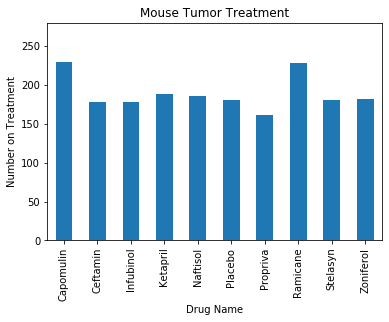

In [13]:
###Generate a bar plot showing number of data points for each treatment regimen using pandas
###find counts
treatment_group = mouse_tumors.groupby('Drug Regimen')
treatment_group
treatment_group_count = treatment_group['Drug Regimen'].count()
treatment_group_count
#create plot
treatment_group_chart = treatment_group_count.plot(kind='bar')
#create labels
plt.title("Mouse Tumor Treatment")
plt.xlabel("Drug Name")
plt.ylabel("Number on Treatment")
#do the fancy design stuff
plt.ylim(0, max(treatment_group_count)+50)
plt.show()

In [14]:
drug_names_list = mouse_tumors['Drug Regimen'].unique()
drug_names_count = mouse_tumors.groupby('Drug Regimen')['Mouse ID'].count()
#drug_names_list, drug_names_count

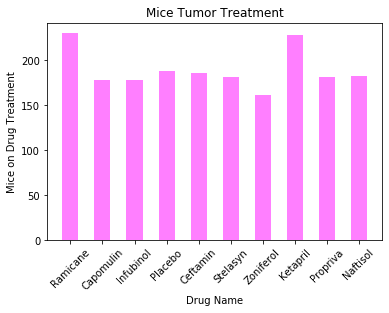

In [15]:
### Generate a bar plot showing number of data points for each treatment regimen using pyplot
#plt.style.use('ggplot')
x = drug_names_list
energy = drug_names_count
plt.bar(x, energy, color='magenta', width=.5,  alpha=0.5)
plt.xlabel("Drug Name")
plt.ylabel("Mice on Drug Treatment")
plt.title("Mice Tumor Treatment")
plt.xticks(rotation=45)
plt.show()

## Pie plots

In [16]:
##create Sex groupby
mouse_sex = mouse_tumors.groupby('Sex')
##count mice when grouped by sex
mouse_sex_count = mouse_tumors.groupby('Sex')['Mouse ID'].count()
##turn results into a dataframe
mouse_sex_count_data_df = pd.DataFrame(mouse_sex_count)
#mouse_sex_count_data_df
##rename columns
mouse_sex_count_data_df.rename(columns={list(mouse_sex_count_data_df)[0]:'Count'}, inplace=True)
##convert/add the index into a column
mouse_sex_count_data_df['Sex'] = mouse_sex_count_data_df.index
#mouse_sex_count_data_df

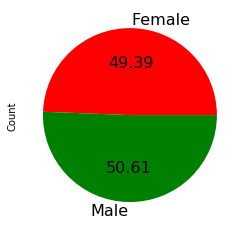

In [17]:
### Generate a pie plot showing the distribution of female versus male mice using pandas
##define variables
sex = mouse_sex_count_data_df["Sex"]
count = mouse_sex_count_data_df["Count"]
##create the pie. this took me f.o.r.e.v.e.r. to figure out
mouse_sex_count_data_df["Count"].plot(kind='pie', labels=sex, colors=['r', 'g'], autopct='%.2f', fontsize=16)

(-1.1184789224411302,
 1.1072403566344964,
 -1.1146713080147752,
 1.1083483883711265)

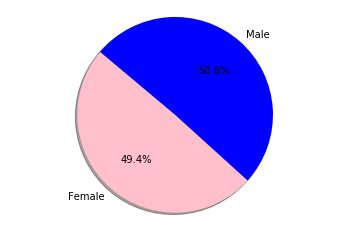

In [18]:
### Generate a pie plot showing the distribution of female versus male mice using pyplot
### Labels for the sections of our pie chart
labels =mouse_sex_count_data_df["Sex"]
### The values of each section of the pie chart
sizes = mouse_sex_count_data_df["Count"]
### The colors of each section of the pie chart
colors = ["pink", "blue"]
###Creates the pie chart based upon the values above
###Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, colors=colors, autopct="%1.1f%%", labels=labels, shadow=True, startangle=140)
### Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

## Quartiles, outliers and boxplots

In [19]:
mouse_tumors.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [20]:
##find unique Mouse ID's so I know how many mice there are (249)
unique_mouse_names = mouse_tumors['Mouse ID'].unique()
#unique_mouse_names
##create dataframe of mouse ID for later use
unique_mouse = pd.DataFrame(unique_mouse_names, columns = ['mouse_id'])
#unique_mouse
#mouse_tumors.dtypes

In [49]:
##drop all columns not needed for current analysis.
promising_treatments = mouse_tumors.drop(columns=['Sex', 'Age_months', 'Weight (g)', 'Metastatic Sites'])
##separate out data based on the 4 Drugs being analyzed    
promising_mice_capomulin = promising_treatments[promising_treatments['Drug Regimen'] == "Capomulin"] 
promising_mice_ramicane = promising_treatments[promising_treatments['Drug Regimen'] == "Ramicane"] 
promising_mice_infubinol = promising_treatments[promising_treatments['Drug Regimen'] == "Infubinol"] 
promising_mice_ceftamin = promising_treatments[promising_treatments['Drug Regimen'] == "Ceftamin"] 


In [50]:
########## ceftamin ##############
##seeing how far each mouse made it in testing..
placeholder_ceftamin = promising_mice_ceftamin.groupby('Mouse ID')['Timepoint'].max() 
#placeholder_ceftamin
##create dataframe w each mouse and their final timeframe
ceftamin_final_timepoint = pd.DataFrame(placeholder_ceftamin)
#ceftamin_final_timepoint
##the results.
ceftamin_final_timepoint_volume = ceftamin_final_timepoint.merge(promising_mice_ceftamin, how='inner', left_on=['Mouse ID', 'Timepoint'], right_on=['Mouse ID', 'Timepoint'])
#ceftamin_final_timepoint_volume

In [51]:
########## ramicane ##############
##seeing how far each mouse made it in testing.
placeholder_ramicane = promising_mice_ramicane.groupby('Mouse ID')['Timepoint'].max() 
#placeholder_ramicane
##create dataframe w each mouse and their final timeframe
ramicane_final_timepoint = pd.DataFrame(placeholder_ramicane)
#ramicane_final_timepoint
##the results.
ramicane_final_timepoint_volume = ramicane_final_timepoint.merge(promising_mice_ramicane, how='inner', left_on=['Mouse ID', 'Timepoint'], right_on=['Mouse ID', 'Timepoint'])
#ramicane_final_timepoint_volume


In [128]:
########## infubinol ##############
##seeing how far each mouse made it in testing.
placeholder_infubinol = promising_mice_infubinol.groupby('Mouse ID')['Timepoint'].max() 
#placeholder_infubinol
##create dataframe w each mouse and their final timeframe
infubinol_final_timepoint = pd.DataFrame(placeholder_infubinol)
#infubinol_final_timepoint
##the results.
infubinol_final_timepoint_volume = infubinol_final_timepoint.merge(promising_mice_infubinol, how='inner', left_on=['Mouse ID', 'Timepoint'], right_on=['Mouse ID', 'Timepoint'])
infubinol_final_timepoint_volume


,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
0,a203,45,Infubinol,67.973419
1,a251,45,Infubinol,65.525743
2,a577,30,Infubinol,57.031862
3,a685,45,Infubinol,66.083066
4,c139,45,Infubinol,72.226731
5,c326,5,Infubinol,36.321346
6,c895,30,Infubinol,60.969711
7,e476,45,Infubinol,62.435404
8,f345,45,Infubinol,60.918767
9,i386,40,Infubinol,67.289621


In [89]:
########## capomulin ##############
##seeing how far each mouse made it in testing..
placeholder_capomulin = promising_mice_capomulin.groupby('Mouse ID')['Timepoint'].max() 
#placeholder_capomulin
##create dataframe w each mouse and their final timeframe
capomulin_final_timepoint = pd.DataFrame(placeholder_capomulin)
#capomulin_final_timepoint
##the results.
capomulin_final_timepoint_volume = capomulin_final_timepoint.merge(promising_mice_capomulin, how='inner', left_on=['Mouse ID', 'Timepoint'], right_on=['Mouse ID', 'Timepoint'])
#capomulin_final_timepoint_volume



In [83]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
#(Capomulin, Ramicane, Infubinol, and Ceftamin)
#stacking all the previous results into 1 dataframe
combine_promising_treatments = (capomulin_final_timepoint_volume, infubinol_final_timepoint_volume, ceftamin_final_timepoint_volume, ramicane_final_timepoint_volume)
most_promising_treatments = pd.concat(combine_promising_treatments)
most_promising_treatments
#rename columns for clarity

volume_most_promising_treatments = most_promising_treatments.rename(columns={"Timepoint": "Final Timepoint", "Tumor Volume (mm3)": "Final Tumor Volume (mm3)"})

final_volume_most_promising_treatments = volume_most_promising_treatments.reset_index()

final_volume_most_promising_treatments




,index,Mouse ID,Final Timepoint,Drug Regimen,Final Tumor Volume (mm3)
0,0,b128,45,Capomulin,38.982878
1,1,b742,45,Capomulin,38.939633
2,2,f966,20,Capomulin,30.485985
3,3,g288,45,Capomulin,37.074024
4,4,g316,45,Capomulin,40.159220
...,...,...,...,...,...
95,20,s508,45,Ramicane,30.276232
96,21,u196,45,Ramicane,40.667713
97,22,w678,5,Ramicane,43.166373
98,23,y449,15,Ramicane,44.183451


In [84]:
#Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens
volume_outliers = final_volume_most_promising_treatments['Final Tumor Volume (mm3)']

quartiles = volume_outliers.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of volume_outliers is: {lowerq}")
print(f"The upper quartile of volume_outliers is: {upperq}")
print(f"The interquartile range of volume_outliers is: {iqr}")
print(f"The the median of volume_outliers is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of volume_outliers is: 37.187743802499995
The upper quartile of volume_outliers is: 59.930261755000004
The interquartile range of volume_outliers is: 22.74251795250001
The the median of volume_outliers is: 45.0 
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


In [127]:
volume_outliers.unique()
#there are no outliers

array([38.98287774, 38.93963263, 30.48598484, 37.07402422, 40.1592203 ,
       47.68596303, 37.31184577, 38.1251644 , 38.75326548, 41.48300765,
       38.84687569, 28.43096411, 33.32909778, 46.53920617, 32.37735684,
       41.58152074, 23.34359787, 40.72857787, 34.45529799, 31.02392294,
       40.65812366, 39.95234669, 36.04104736, 28.48403281, 31.8962384 ,
       67.97341878, 65.52574285, 57.03186187, 66.08306589, 72.2267309 ,
       36.3213458 , 60.96971133, 62.43540402, 60.91876652, 67.28962147,
       66.19691151, 62.11727887, 47.01036401, 60.16518046, 55.62942846,
       45.69933088, 54.65654872, 55.65068132, 46.25011212, 54.04860769,
       51.54243058, 50.00513807, 58.26844248, 67.68556862, 62.75445141,
       62.99935619, 45.        , 56.05774909, 55.74282869, 48.72207785,
       47.7846818 , 61.84902336, 68.92318457, 67.74866174, 57.91838132,
       46.78453491, 59.85195552, 64.29983003, 59.74190064, 61.43389223,
       64.19234114, 52.92534846, 67.52748237, 64.63494887, 61.38

In [96]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#  **Hint**: All four box plots should be within the same figure. Use this [Matplotlib documentation page]
#(https://matplotlib.org/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py) for help with changing the style of the outliers.

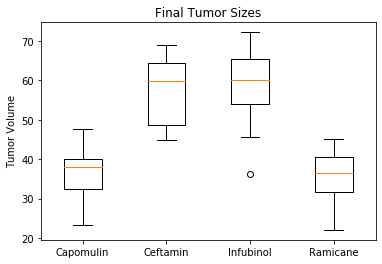

In [105]:
##create seperate outlier datasets for each drug
capomulin_outliers = capomulin_final_timepoint_volume['Tumor Volume (mm3)']
ceftamin_outliers = ceftamin_final_timepoint_volume['Tumor Volume (mm3)']
infubinol_outliers = infubinol_final_timepoint_volume['Tumor Volume (mm3)']
ramicane_outliers = ramicane_final_timepoint_volume['Tumor Volume (mm3)']
##set data
data = [capomulin_outliers, ceftamin_outliers, infubinol_outliers, ramicane_outliers]
##create labels for each boxplot for clarity
labels = ('Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane')
fig1, ax1 = plt.subplots()
ax1.boxplot(data)
## add titles and labels
ax1.set_title('Final Tumor Sizes')
ax1.set_ylabel('Tumor Volume')
plt.xticks(np.arange(len(labels))+1,labels)
plt.show()

## Line and scatter plots

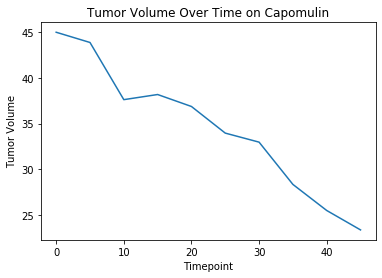

In [102]:
### Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#mouse_tumors
capomulin_mice = mouse_tumors[mouse_tumors['Drug Regimen'] == "Capomulin"] 
##mouse s185 chosen for the example
capomulin_s185= capomulin_mice[capomulin_mice['Mouse ID'] == "s185"]
capomulin_s185
##drop unneded columns
capomulin_s185.drop(columns=['Sex', 'Age_months', 'Weight (g)', 'Metastatic Sites'])
##input data for X and Y axis'
x_axis = capomulin_s185['Timepoint']
y_axis = capomulin_s185['Tumor Volume (mm3)']
##plot data
plt.plot(x_axis, y_axis)
##add labels and title
plt.title("Tumor Volume Over Time on Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
##show plot
plt.show()

In [100]:
capomulin_mice_vol_avg = capomulin_mice.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
capomulin_mice_weight_avg = capomulin_mice.groupby('Mouse ID')['Weight (g)'].mean()
#capomulin_mice_vol_avg, capomulin_mice_weight_avg

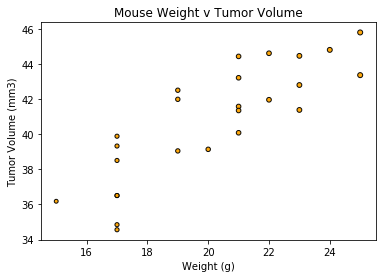

In [108]:
### Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#capomulin_mice
##drop unneded columns
capomulin_weight_volume = capomulin_mice.drop(columns=['Sex', 'Age_months', 'Timepoint', 'Metastatic Sites'])
#capomulin_weight_volume
##set axis'
x_axis = capomulin_mice_weight_avg
y_axis = capomulin_mice_vol_avg
##create plot
plt.scatter(x_axis, y_axis, marker="o", facecolors="orange", edgecolors="black",
            s=x_axis, alpha=0.95)
##create title and labels
plt.title("Mouse Weight v Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


In [111]:
###Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume
###for the Capomulin regimen
mouse_weight = capomulin_mice_vol_avg
avg_tumor_volume = capomulin_mice_weight_avg
correlation = st.pearsonr(mouse_weight,avg_tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

#capomulin_mice_vol_avg
#capomulin_mice_weight_avg

The correlation between both factors is 0.84


y = 0.95x + 21.55


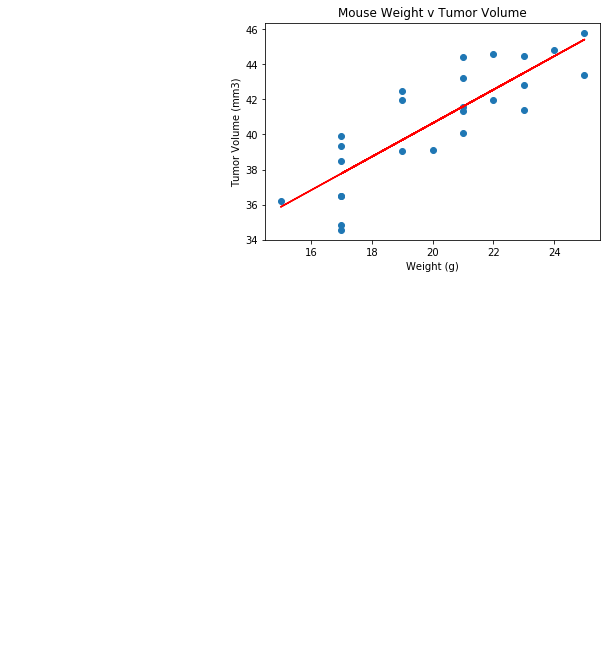

In [113]:
###linear regression model for mouse weight and average tumor volume
x_axis = capomulin_mice_weight_avg
y_axis = capomulin_mice_vol_avg
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Mouse Weight v Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
print(line_eq)
plt.show()
